In [ ]:
import pandas as pd
import numpy as np 
from collections import Counter as c 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn. metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle


In [ ]:
data=pd.read_csv("/content/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']
data.columns


Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [ ]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [ ]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True) 
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True) 
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True) 
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True) 
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')

data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True) 
data['potassium'].fillna(data['potassium'].mean(),inplace=True) 
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')

data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True) 
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True) 
data['sodium'].fillna(data['sodium'].mean(),inplace=True) 
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')

data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


In [ ]:
data['age'].fillna(data['age'].mode()[0],inplace=True) 
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True) 
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True) 
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True) 
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True) 
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True) 
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True) 
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True) 
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True) 
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True) 
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True) 
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True) 
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True) 
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True) 


In [ ]:
catcols=set(data.dtypes[data.dtypes==object].index.values)
print(catcols)


{'coronary_artery_disease', 'diabetesmellitus', 'bacteria', 'anemia', 'appetite', 'class', 'pedal_edema', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'hypertension'}


In [ ]:
for i in catcols:
  print("Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n') 

Columns: coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
************************************************************************************************************************

Columns: diabetesmellitus
Counter({'no': 260, 'yes': 134, '\tno': 3, '\tyes': 2, ' yes': 1})
************************************************************************************************************************

Columns: bacteria
Counter({'notpresent': 378, 'present': 22})
************************************************************************************************************************

Columns: anemia
Counter({'no': 340, 'yes': 60})
************************************************************************************************************************

Columns: appetite
Counter({'good': 318, 'poor': 82})
************************************************************************************************************************

Columns: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t'

In [ ]:

  catcols=['pus_cell_clumps', 'red_blood_cells', 'appetite', 'anemia', 'diabetesmellitus', 'pus_cell', 'coronary_artery_disease', 'pedal_edema', 'bacteria', 'hypertension', 'class']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("Label Encoding Of:",i)
  LEi=LabelEncoder()
  print(c(data[i]))
  data[i]=LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

Label Encoding Of: pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
Counter({0: 358, 1: 42})
****************************************************************************************************
Label Encoding Of: red_blood_cells
Counter({'normal': 353, 'abnormal': 47})
Counter({1: 353, 0: 47})
****************************************************************************************************
Label Encoding Of: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
Label Encoding Of: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
Label Encoding Of: diabetesmellitus
Counter({'no': 260, 'yes': 134, '\tno': 3, '\tyes': 2, ' yes': 1})
Counter({3: 260, 4: 134, 0: 3, 1: 2, 2: 1})
*************************************************************************

In [ ]:
contcols=set(data.dtypes[data.dtypes!=0].index.values)
print(contcols)

{'bacteria', 'anemia', 'age', 'specific_gravity', 'pus_cell', 'blood_urea', 'hypertension', 'red_blood_cell_count', 'coronary_artery_disease', 'white_blood_cell_count', 'blood_pressure', 'pedal_edema', 'pus_cell_clumps', 'potassium', 'serum_creatinine', 'hemoglobin', 'albumin', 'packed_cell_volume', 'blood_glucose_random', 'id', 'sodium', 'appetite', 'class', 'red_blood_cells', 'diabetesmellitus', 'sugar'}


In [ ]:
for i in contcols:
  print("Continuous Columns:",i)
  print(c(data[i]))
  print("*"*120+'\n')

Continuous Columns: bacteria
Counter({0: 378, 1: 22})
************************************************************************************************************************

Continuous Columns: anemia
Counter({0: 340, 1: 60})
************************************************************************************************************************

Continuous Columns: age
Counter({60.0: 28, 65.0: 17, 48.0: 12, 50.0: 12, 55.0: 12, 47.0: 11, 62.0: 10, 45.0: 10, 54.0: 10, 59.0: 10, 56.0: 10, 61.0: 9, 70.0: 9, 46.0: 9, 34.0: 9, 68.0: 8, 73.0: 8, 64.0: 8, 71.0: 8, 57.0: 8, 63.0: 7, 72.0: 7, 67.0: 7, 30.0: 7, 42.0: 6, 69.0: 6, 35.0: 6, 44.0: 6, 43.0: 6, 33.0: 6, 51.0: 5, 52.0: 5, 53.0: 5, 75.0: 5, 76.0: 5, 58.0: 5, 41.0: 5, 66.0: 5, 24.0: 4, 40.0: 4, 39.0: 4, 80.0: 4, 23.0: 4, 74.0: 3, 38.0: 3, 17.0: 3, 8.0: 3, 32.0: 3, 37.0: 3, 25.0: 3, 29.0: 3, 21.0: 2, 15.0: 2, 5.0: 2, 12.0: 2, 49.0: 2, 19.0: 2, 36.0: 2, 20.0: 2, 28.0: 2, 7.0: 1, 82.0: 1, 11.0: 1, 26.0: 1, 81.0: 1, 14.0: 1, 27.0: 1, 83.0: 

In [ ]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({1: 364, 2: 34, 0: 2})

In [ ]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':''})
c(data['diabetesmellitus'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

In [ ]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,38.884498,8406.122449,4.707435,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,8.151081,2523.219976,0.840314,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.000000,6975.000000,4.500000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,38.884498,8406.122449,4.707435,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.000000,9400.000000,5.100000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,26400.000000,8.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


<ipython-input-18-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

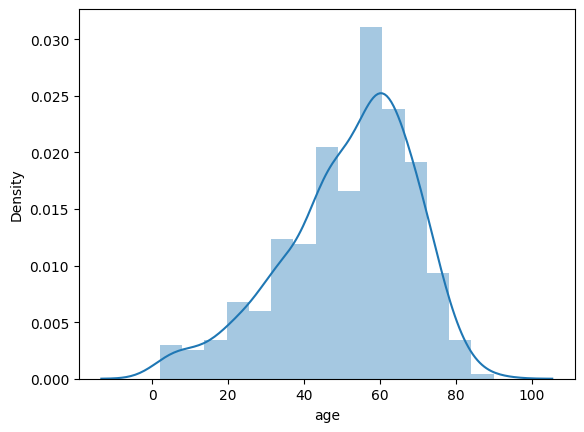

In [ ]:
sns.distplot(data.age)

Text(0.5, 1.0, 'Age VS Blood Scatter Plot')

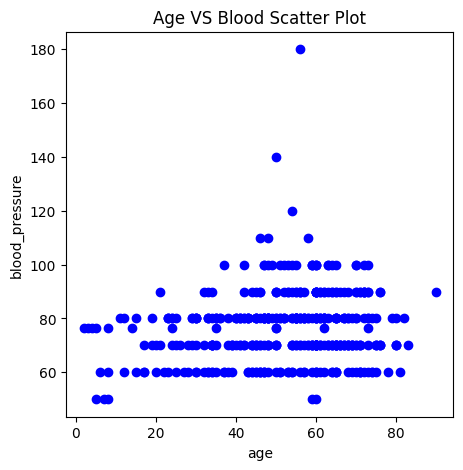

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title("Age VS Blood Scatter Plot")

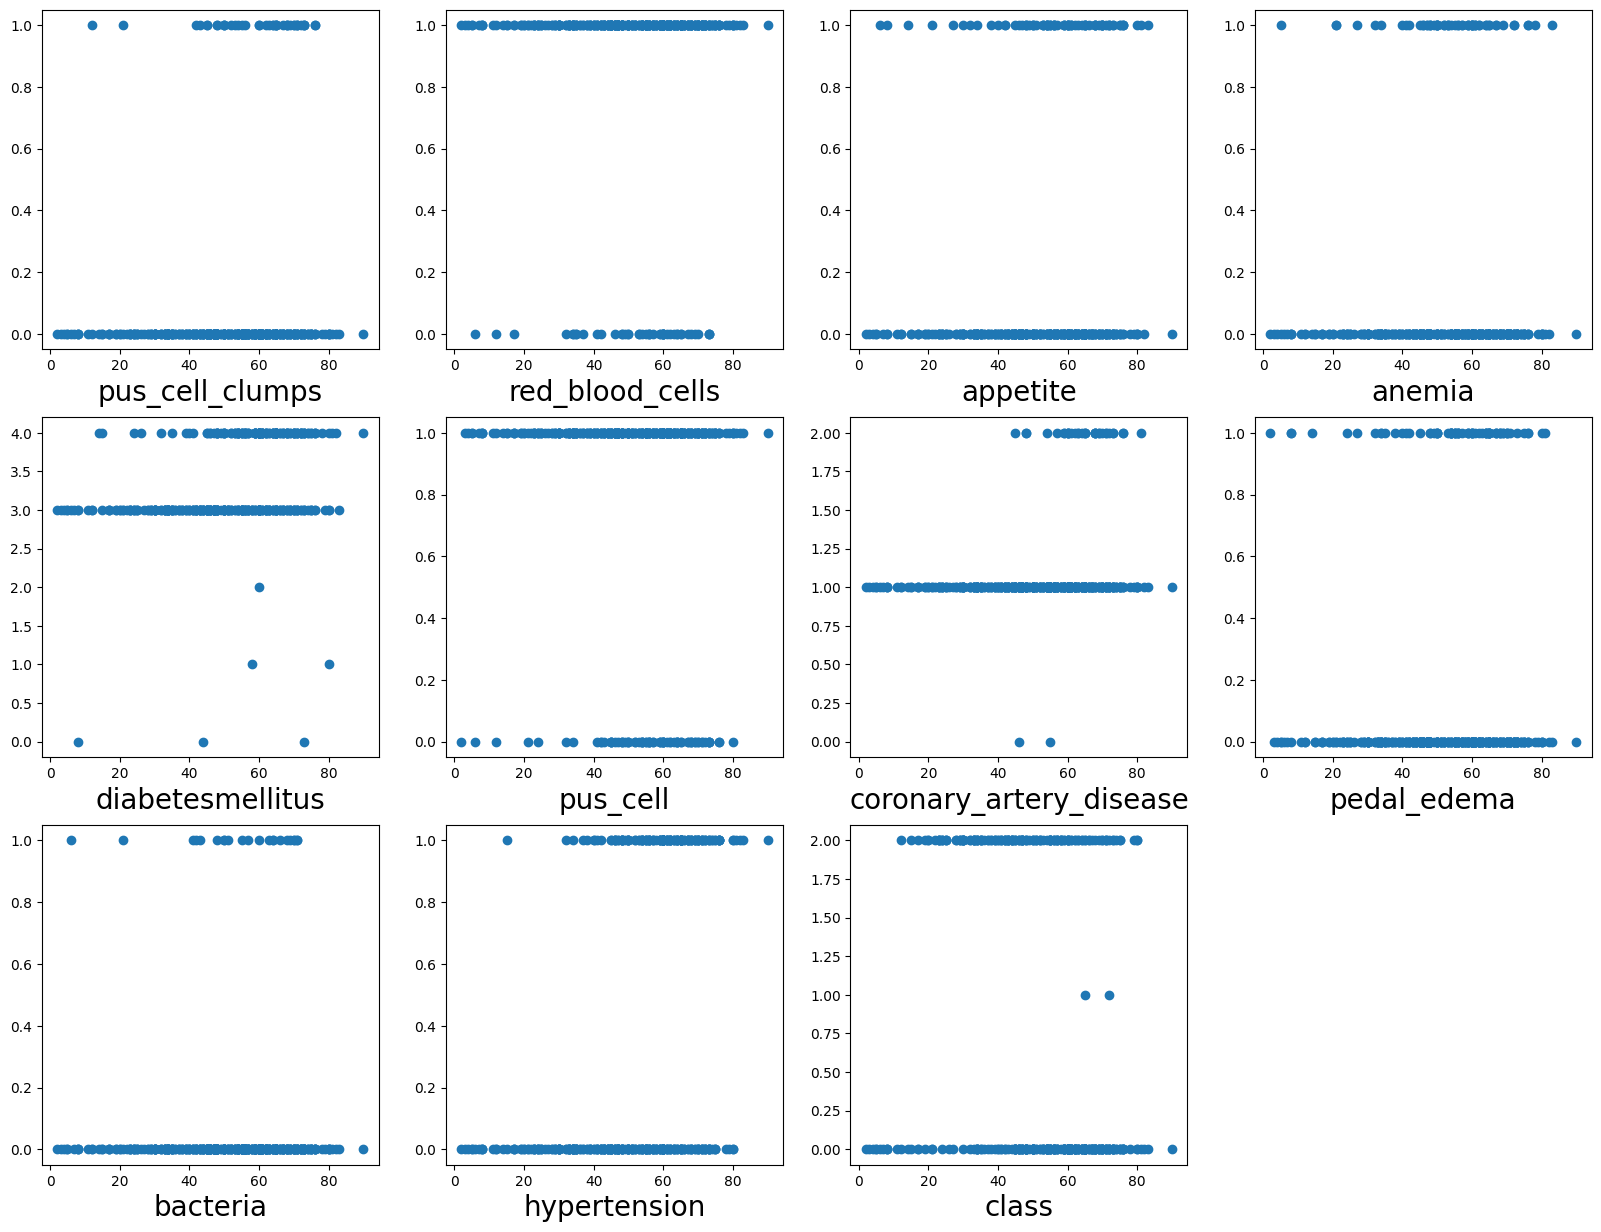

In [ ]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in catcols:
  if plotnumber<=11:
    ax=plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()

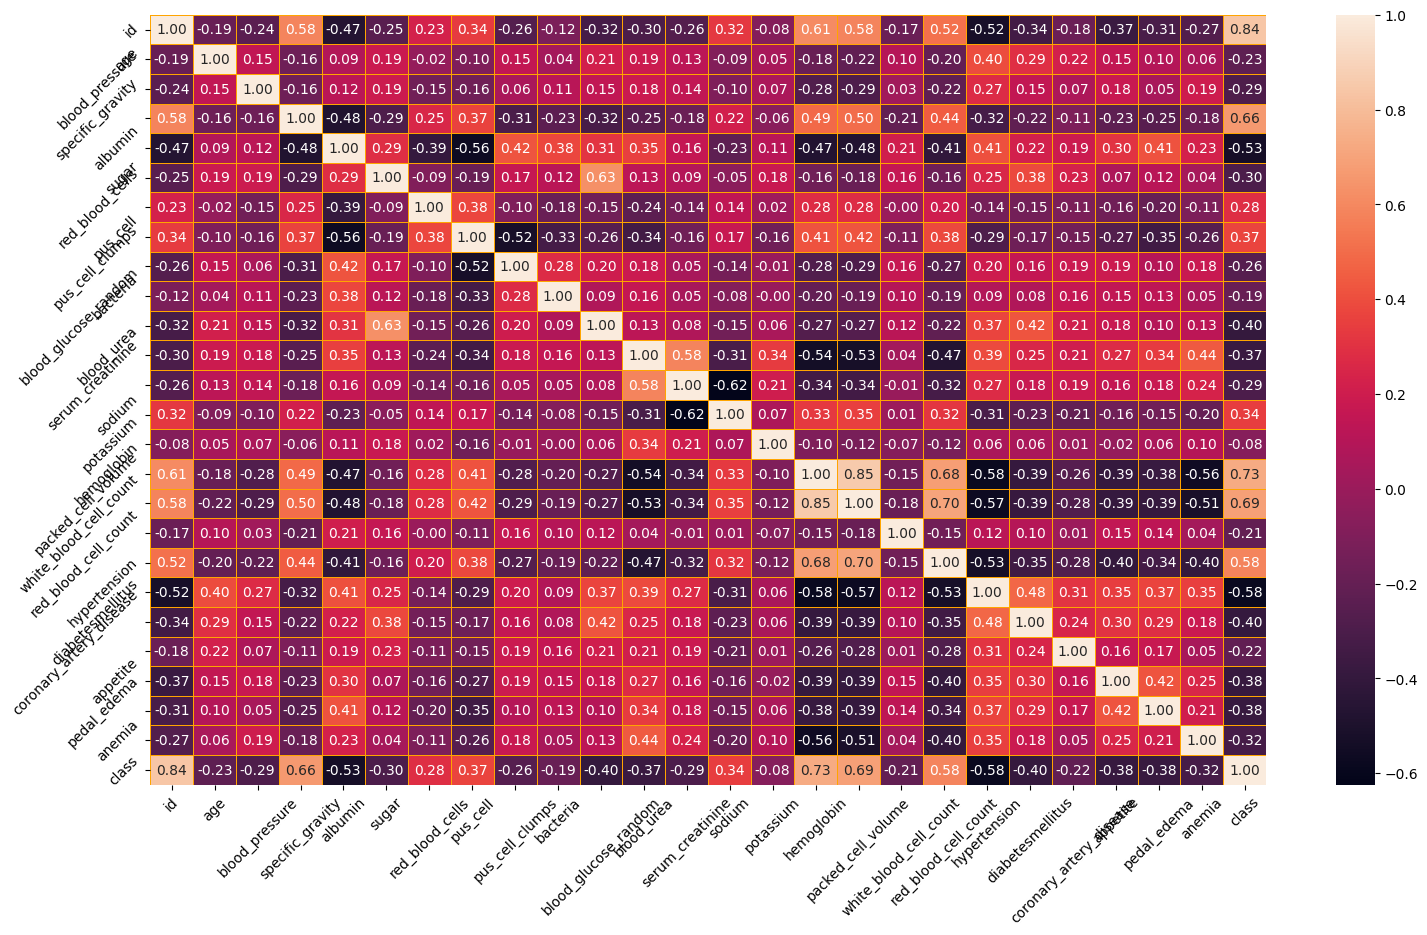

In [ ]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

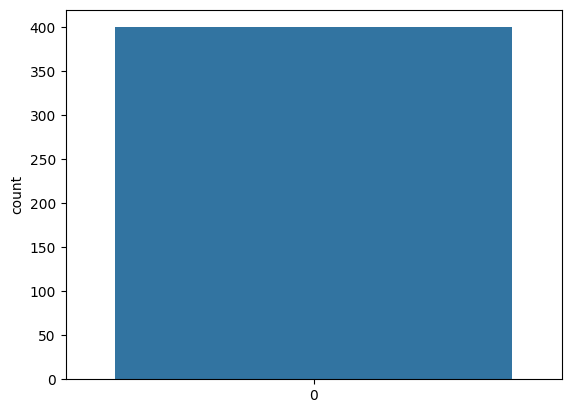

In [ ]:
sns.countplot(data['class'])

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

sc = StandardScaler()
x_bal = sc.fit_transform(x)



In [ ]:
selcols=['red_blood_cells','pus_cell','blood_glucose_random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
classification=Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))


In [ ]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 2s 12ms/step - loss: 1.1746 - accuracy: 0.2461 - val_loss: 0.5142 - val_accuracy: 0.1875
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4985 - accuracy: 0.2109 - val_loss: 0.4280 - val_accuracy: 0.2656
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4642 - accuracy: 0.2539 - val_loss: 0.5022 - val_accuracy: 0.1875
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.2422 - val_loss: 0.3746 - val_accuracy: 0.2500
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4354 - accuracy: 0.2305 - val_loss: 0.4670 - val_accuracy: 0.1875
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3265 - accuracy: 0.2617 - val_loss: 0.5609 - val_accuracy: 0.1875
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3089 - accuracy: 0.2305 - val_loss: 0.3169 - val_accuracy: 0.2969
Epoch 8/100


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')
rfc.fit(x_train,y_train)

<ipython-input-30-629555a109aa>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_predict=rfc.predict(x_test)

In [ ]:
y_predict_train=rfc.predict(x_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_predict=dtc.predict(x_test)
y_predict 

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0])

In [ ]:
y_predict_train=dtc.predict(x_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
y_predict=lgr.predict(x_test)

In [ ]:
y_pred=lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
y_pred=dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
y_pred=rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
classification.save("ckd.h5")

In [ ]:
y_pred=classification.predict(x_test)
y_pred

3/3 [==============================] - 0s 3ms/step


array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

In [ ]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [ ]:
def predict_exit(sample_value):
  sample_value=np.array(sample_value)
  sample_value=sample_value.reshape(1,-1)
  sample_value=sc.transform(sample_value)
  return classifier.predict(sample_value)

In [ ]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
  print('Prediction:High Change Of CKD!')
else:
  print('Prediction:Low Change Of CKD.')

1/1 [==============================] - 0s 90ms/step
Prediction:High Change Of CKD!


In [ ]:
from sklearn import model_selection
dfs = []
models = [('LogReg',LogisticRegression()), ('RF',RandomForestClassifier()), ('DecisionTree',DecisionTreeClassifier())]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['No CKD', 'CKD']

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names, labels=[0, 1]))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

final = pd.concat(dfs, ignore_index=True)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent cal

LogReg
              precision    recall  f1-score   support

      No CKD       0.98      0.91      0.94        53
         CKD       0.00      0.00      0.00         1

   micro avg       0.98      0.89      0.93        54
   macro avg       0.49      0.45      0.47        54
weighted avg       0.96      0.89      0.92        54



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 78, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

RF
              precision    recall  f1-score   support

      No CKD       0.94      0.96      0.95        53
         CKD       0.00      0.00      0.00         1

   micro avg       0.94      0.94      0.94        54
   macro avg       0.47      0.48      0.48        54
weighted avg       0.93      0.94      0.94        54

DecisionTree
              precision    recall  f1-score   support

      No CKD       0.91      0.94      0.93        53
         CKD       0.00      0.00      0.00         1

   micro avg       0.91      0.93      0.92        54
   macro avg       0.45      0.47      0.46        54
weighted avg       0.89      0.93      0.91        54



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_val

In [ ]:
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()
lr.fit(x_train, y_train)

# generate predictions on the test set
y_predict = lr.predict(x_test)

# generate the confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[48  0  5]
 [ 1  0  0]
 [ 0  0 26]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


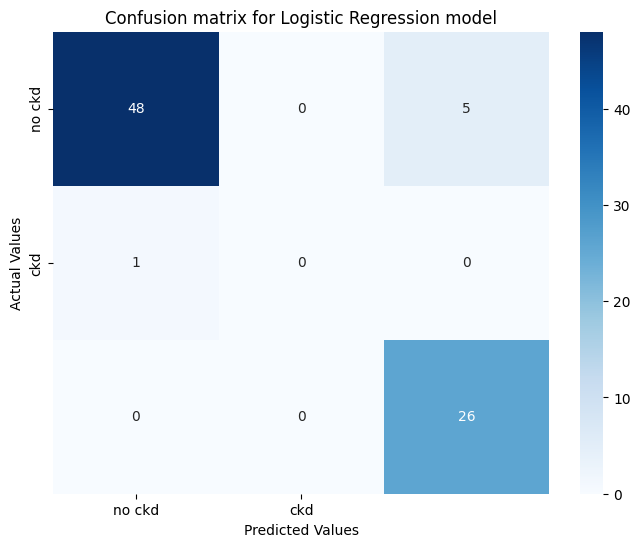

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion matrix for Logistic Regression model')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=100, max_depth=5)

# Fit the model on training data
rf.fit(x_train, y_train)

# Generate predictions on test data
y_predict = rf.predict(x_test)

# Generate confusion matrix using actual labels and predicted labels
cm = confusion_matrix(y_test, y_predict)

# Print the confusion matrix
print(cm)

[[51  0  2]
 [ 1  0  0]
 [ 1  0 25]]


<ipython-input-49-fc352b8bcffc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


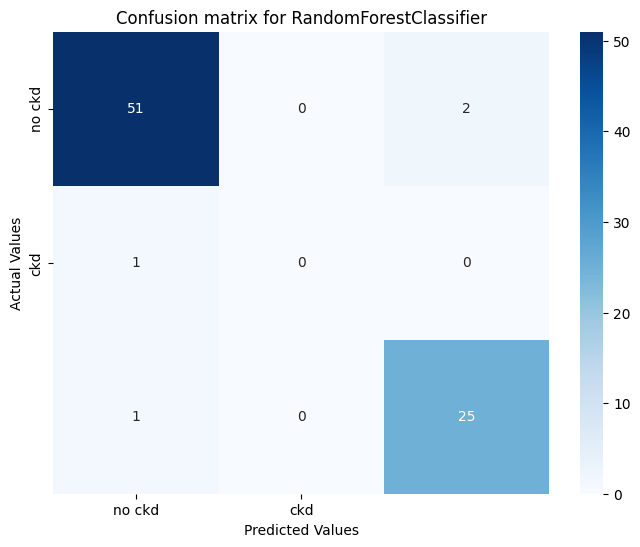

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion matrix for RandomForestClassifier')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
dtc = DecisionTreeClassifier(max_depth=5)

# Fit the model on training data
dtc.fit(x_train, y_train)

# Generate predictions on test data
y_predict = dtc.predict(x_test)

# Generate confusion matrix using actual labels and predicted labels
cm = confusion_matrix(y_test, y_predict)

# Print the confusion matrix
print(cm)

[[50  0  3]
 [ 1  0  0]
 [ 1  0 25]]


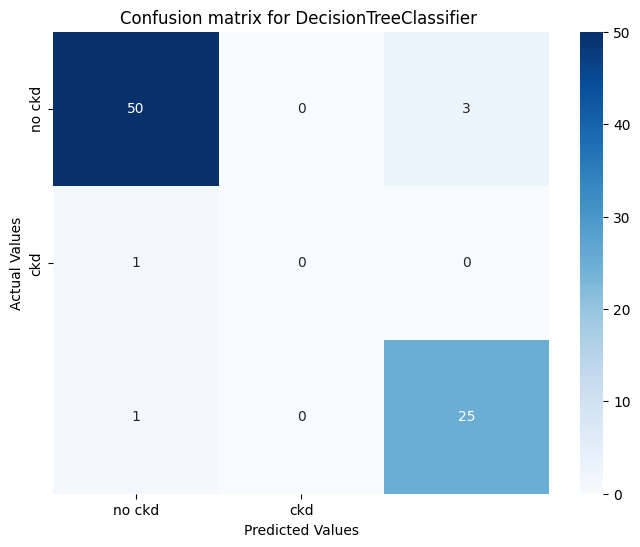

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion matrix for DecisionTreeClassifier ')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.00      0.00      0.00         1
           2       0.88      0.85      0.86        26

    accuracy                           0.90        80
   macro avg       0.60      0.60      0.60        80
weighted avg       0.89      0.90      0.89        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix


# Generate predictions on test data
y_predict = model.predict(x_test)

# Generate confusion matrix using actual labels and predicted labels
cm = confusion_matrix(y_test, y_predict)

# Print the confusion matrix
print(cm)

[[50  0  3]
 [ 1  0  0]
 [ 4  0 22]]


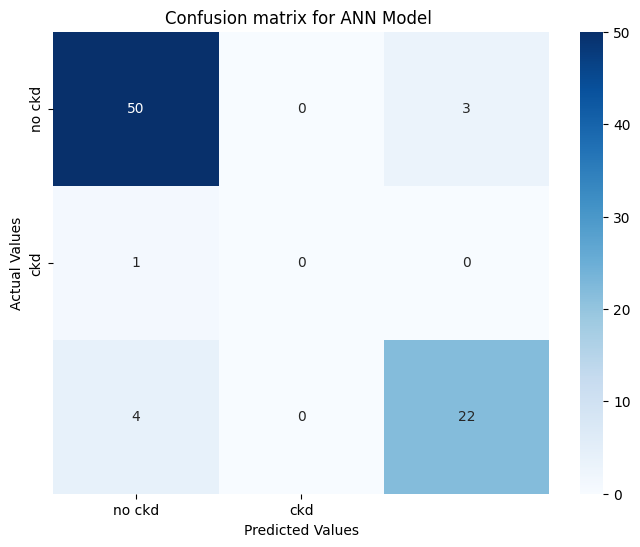

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion matrix for ANN Model ')
plt.show()

In [ ]:
bootstraps=[]
for model in list(set(final.model.values)):
  model_df=final.loc[final.model==model]
  bootstrap=model_df.sample(n=30,replace=True)
  bootstraps.append(bootstrap)
bootstrap_df=pd.concat(bootstraps,ignore_index=True)
results_long=pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics',value_name='values')
time_metrics=['fit_time','score_time']
results_long_nofit=results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit=results_long_nofit.sort_values(by='values')
results_long_fit=results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit=results_long_fit.sort_values(by='values')


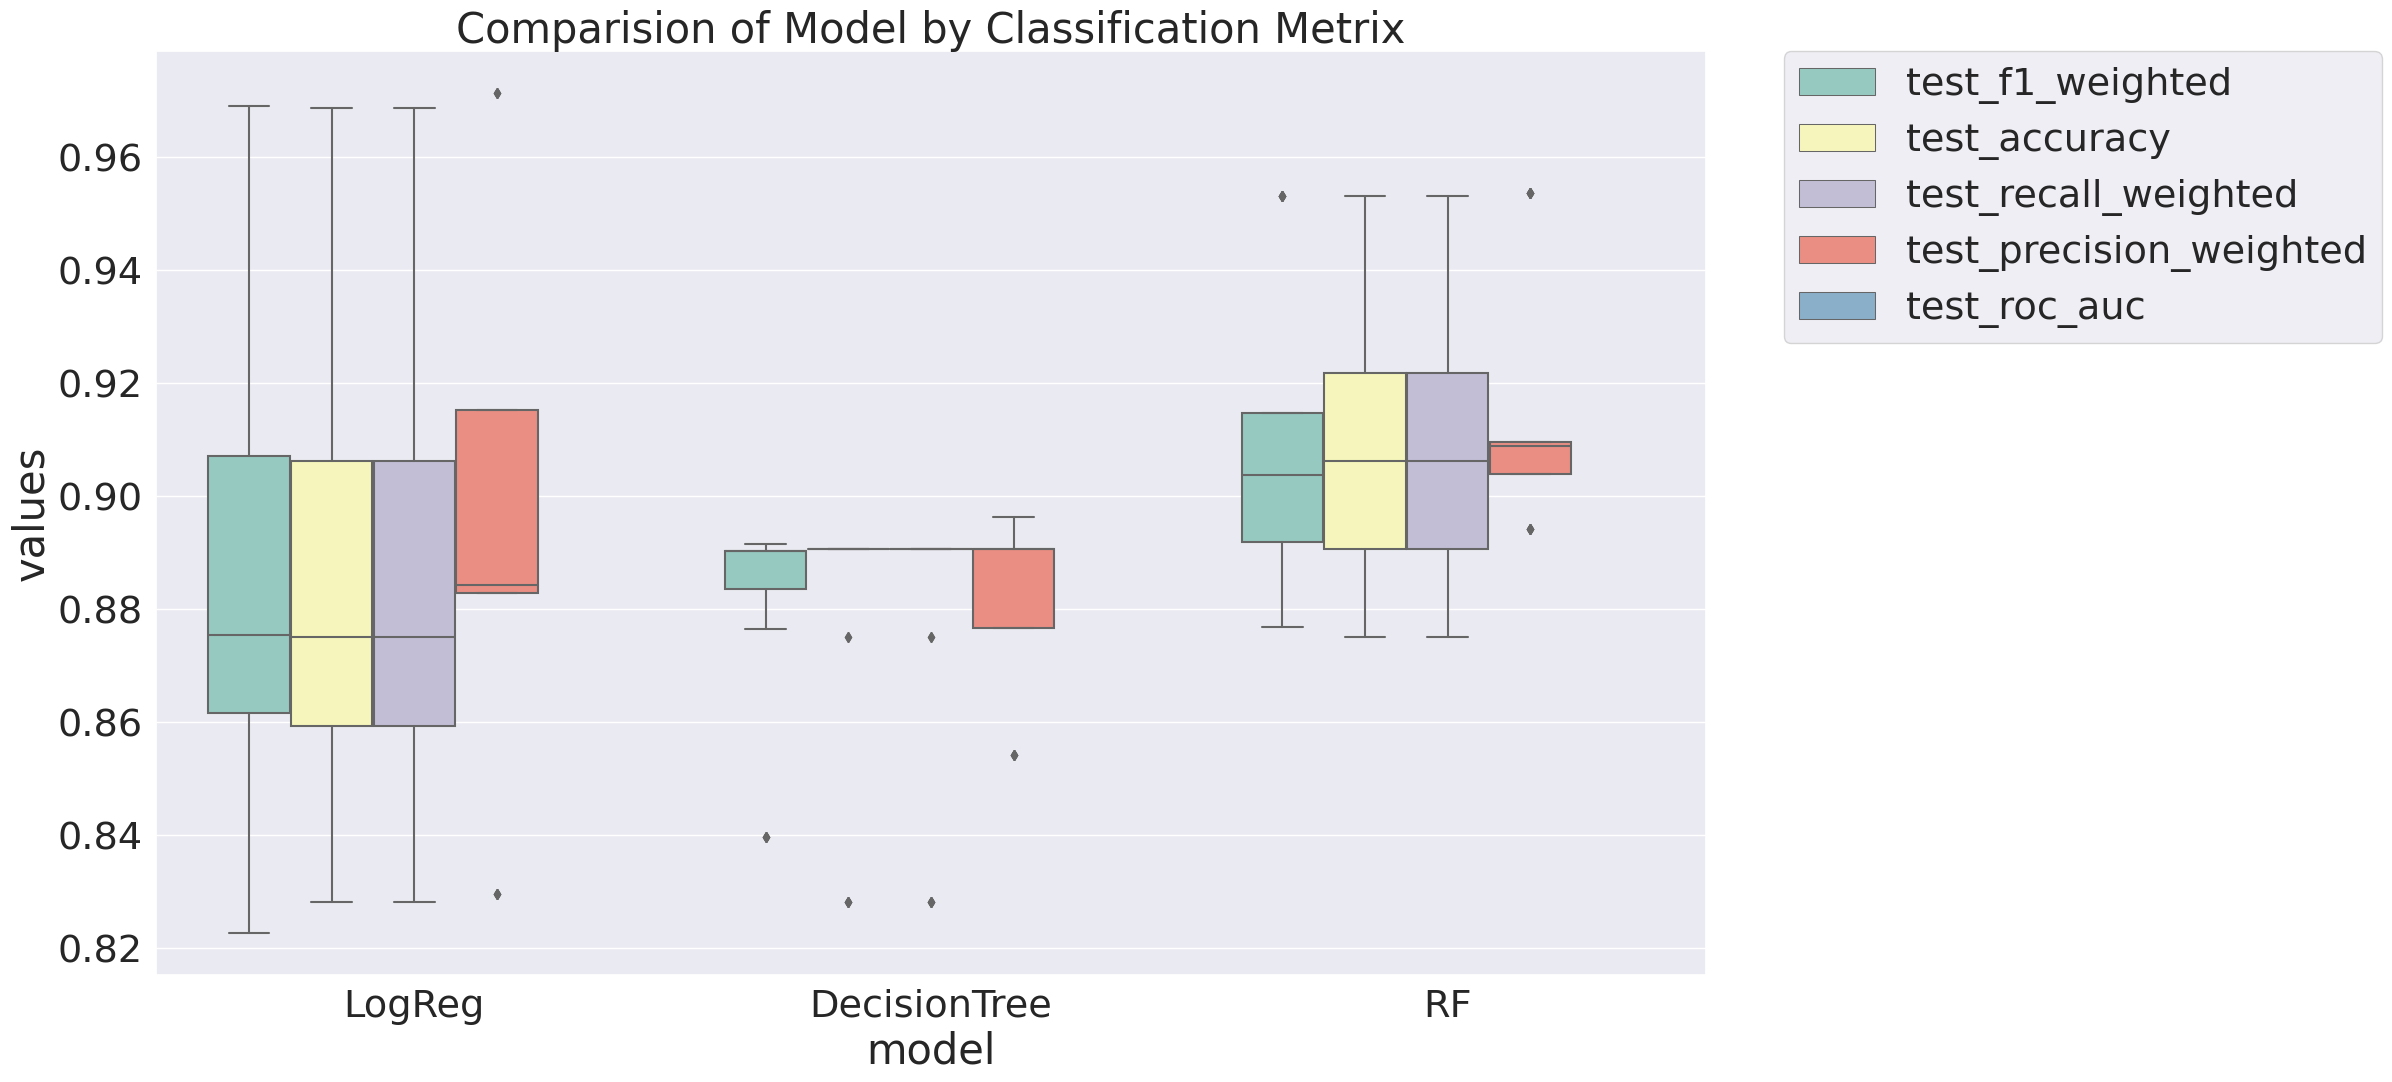

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g=sns.boxplot(x='model',y='values',hue='metrics',data=results_long_nofit,palette="Set3")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
plt.title('Comparision of Model by Classification Metrix')
plt.savefig('./benchmark_models_performance.png',dpi=300)